Jhillian M. Cabos CPE22S3

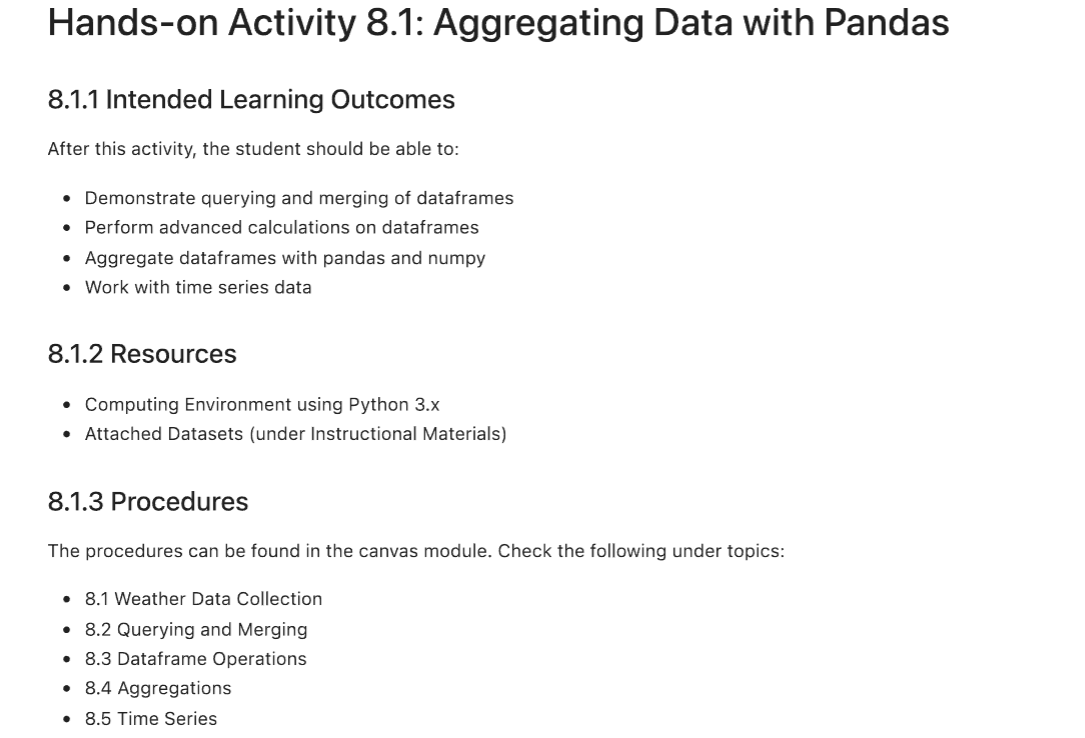

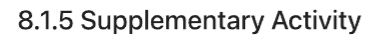

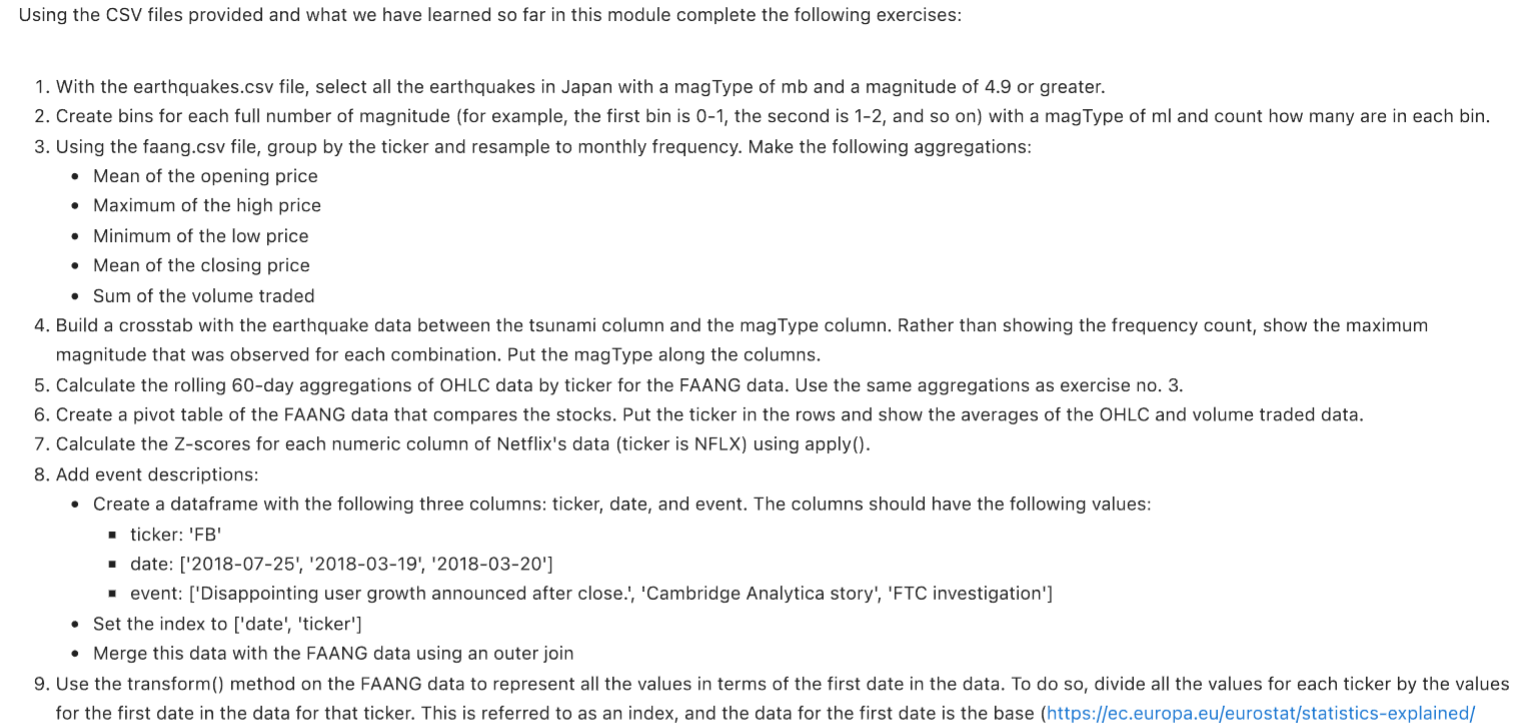

First we import Pandas and read the csv file

In [1]:
import pandas as pd

In [2]:
earthquakes = pd.read_csv('earthquakes.csv')

Selecting all earthquakes in Japan with magType of mb ad magnitude of 4.9

In [3]:
japan_earthquakes = earthquakes[(earthquakes['place'].str.contains('Japan')) &
                                (earthquakes['magType'] == 'mb') &
                                (earthquakes['mag'] >= 4.9)]

In [4]:
japan_earthquakes

,mag,magType,time,place,tsunami,parsed_place
1563,4.9,mb,1538977532250,"293km ESE of Iwo Jima, Japan",0,Japan
2576,5.4,mb,1538697528010,"37km E of Tomakomai, Japan",0,Japan
3072,4.9,mb,1538579732490,"15km ENE of Hasaki, Japan",0,Japan
3632,4.9,mb,1538450871260,"53km ESE of Hitachi, Japan",0,Japan


 Creating bins for each full number of magnitude

In [5]:
bins = [i for i in range(11)]
ml_earthquakes = earthquakes[earthquakes['magType'] == 'ml']
magnitude_bins = pd.cut(ml_earthquakes['mag'], bins=bins, right=False)
magnitude_counts = magnitude_bins.value_counts().sort_index()

In [6]:
magnitude_counts

[0, 1)     2072
[1, 2)     3126
[2, 3)      985
[3, 4)      153
[4, 5)        6
[5, 6)        2
[6, 7)        0
[7, 8)        0
[8, 9)        0
[9, 10)       0
Name: mag, dtype: int64

Getting the Faang csv

In [7]:
faang_data = pd.read_csv('faang.csv', parse_dates=['date'], index_col='date')

Resample to monthly frequency

In [14]:
monthly_data = faang_data.resample('M')

Mean of the opening price

In [15]:
mean_open = monthly_data['open'].mean()
mean_open

date
2018-01-31    602.985367
2018-02-28    630.379919
2018-03-31    659.370467
2018-04-30    630.976625
2018-05-31    669.764352
2018-06-30    720.324453
2018-07-31    747.627404
2018-08-31    770.316621
2018-09-30    778.857875
2018-10-31    726.020216
2018-11-30    660.106022
2018-12-31    636.783692
Freq: M, Name: open, dtype: float64

Maximum of the high price


Minimum of the low price


Mean of the closing price


Sum of the volume traded

In [16]:
max_high = monthly_data['high'].max()
max_high

date
2018-01-31    1472.58
2018-02-28    1528.70
2018-03-31    1617.54
2018-04-30    1638.10
2018-05-31    1635.00
2018-06-30    1763.10
2018-07-31    1880.05
2018-08-31    2025.57
2018-09-30    2050.50
2018-10-31    2033.19
2018-11-30    1784.00
2018-12-31    1778.34
Freq: M, Name: high, dtype: float64

In [17]:
min_low = monthly_data['low'].min()
min_low

date
2018-01-31    161.5708
2018-02-28    147.9865
2018-03-31    149.0200
2018-04-30    150.5100
2018-05-31    162.7911
2018-06-30    178.7056
2018-07-31    166.5600
2018-08-31    170.2700
2018-09-30    158.8656
2018-10-31    139.0300
2018-11-30    126.8500
2018-12-31    123.0200
Freq: M, Name: low, dtype: float64

In [18]:
mean_close = monthly_data['close'].mean()
mean_close

date
2018-01-31    605.670330
2018-02-28    629.441008
2018-03-31    657.890927
2018-04-30    628.496051
2018-05-31    672.370756
2018-06-30    720.472016
2018-07-31    748.380326
2018-08-31    771.750114
2018-09-30    777.852428
2018-10-31    720.353999
2018-11-30    660.774664
2018-12-31    632.578367
Freq: M, Name: close, dtype: float64

In [19]:
sum_volume = monthly_data['volume'].sum()
sum_volume

date
2018-01-31    1518822484
2018-02-28    1809270408
2018-03-31    2149239610
2018-04-30    1851273970
2018-05-31    1267635998
2018-06-30    1276967283
2018-07-31    1481677778
2018-08-31    1587875763
2018-09-30    1473582000
2018-10-31    2007508942
2018-11-30    1912624638
2018-12-31    1887076649
Freq: M, Name: volume, dtype: int64

Build the crosstab without specifying a custom aggregation function

In [20]:
crosstab_result = pd.crosstab(earthquakes['tsunami'], earthquakes['magType'],
                               values=earthquakes['mag'], aggfunc='max')

In [21]:
crosstab_result

magType,mb,mb_lg,md,mh,ml,ms_20,mw,mwb,mwr,mww
tsunami,,,,,,,,,,
0,5.6,3.5,4.11,1.1,4.2,NaN,3.83,5.8,4.8,6.0
1,6.1,NaN,NaN,NaN,5.1,5.7,4.41,NaN,NaN,7.5


Calculating rolling 60-day aggregations by ticker

In [22]:
rolling_agg = faang_data.groupby('ticker').rolling(window='60D')

aggregations = {
    'open': 'mean',
    'high': 'max',
    'low': 'min',
    'close': 'mean',
    'volume': 'sum'
}

rolling_stats = rolling_agg.agg(aggregations)

In [23]:
rolling_stats

open      high       low       close       volume
ticker date                                                               
AAPL   2018-01-02  166.927100  169.0264  166.0442  168.987200   25555934.0
       2018-01-03  168.089600  171.2337  166.0442  168.972500   55073833.0
       2018-01-04  168.480367  171.2337  166.0442  169.229200   77508430.0
       2018-01-05  168.896475  172.0381  166.0442  169.840675  101168448.0
       2018-01-08  169.324680  172.2736  166.0442  170.080040  121736214.0
...                       ...       ...       ...         ...          ...
NFLX   2018-12-24  283.509250  332.0499  233.6800  281.931750  525657894.0
       2018-12-26  281.844500  332.0499  231.2300  280.777750  520444588.0
       2018-12-27  281.070488  332.0499  231.2300  280.162805  532679805.0
       2018-12-28  279.916341  332.0499  231.2300  279.461341  521968250.0
       2018-12-31  278.430769  332.0499  231.2300  277.451410  476309676.0

[1255 rows x 5 columns]

pivot table of the FAANG data that compares the stocks

In [24]:
pivot_table = pd.pivot_table(faang_data, index='ticker', aggfunc='mean')
pivot_table

,close,high,low,open,volume
ticker,,,,,
AAPL,186.986218,188.906858,185.135729,187.038674,3.402145e+07
AMZN,1641.726175,1662.839801,1619.840398,1644.072669,5.649563e+06
FB,171.510936,173.615298,169.303110,171.454424,2.768798e+07
GOOG,1113.225139,1125.777649,1101.001594,1113.554104,1.742645e+06
NFLX,319.290299,325.224583,313.187273,319.620533,1.147030e+07


using apply()

In [29]:
from scipy.stats import zscore

In [25]:
faang_data = pd.read_csv('faang.csv', parse_dates=['date'])

In [26]:
netflix_data = faang_data[faang_data['ticker'] == 'NFLX']

In [31]:
z_scores = netflix_data.select_dtypes(include=['float64', 'int64']).apply(zscore)

In [32]:
z_scores

,open,high,low,close,volume
753,-2.505749,-2.521050,-2.415042,-2.421473,-0.088937
754,-2.385047,-2.428022,-2.290360,-2.339951,-0.508620
755,-2.300860,-2.410885,-2.239081,-2.328071,-0.961204
756,-2.279559,-2.350294,-2.206487,-2.238767,-0.783894
757,-2.223367,-2.299699,-2.148042,-2.196572,-1.040606
...,...,...,...,...,...
999,-1.574618,-1.521399,-1.630448,-1.749435,-0.339680
1000,-1.738529,-1.442855,-1.680690,-1.344082,0.518073
1001,-1.410097,-1.420618,-1.498794,-1.305267,0.135138
1002,-1.251257,-1.291594,-1.299877,-1.294718,-0.085334


Add event descriptions

In [39]:
events_data = pd.DataFrame({
    'ticker': 'FB',
    'date': pd.to_datetime(['2018-07-25', '2018-03-19', '2018-03-20']),
    'event': ['Disappointing user growth announced after close.',
              'Cambridge Analytica story',
              'FTC investigation']
})
faang_data = pd.read_csv('faang.csv', parse_dates=['date'])
merged_data = pd.merge(faang_data, events_data, how='outer', on=['date', 'ticker'])
print("Merged DataFrame:")
print(merged_data)

Merged DataFrame:
     ticker       date     open     high        low    close    volume event
0        FB 2018-01-02   177.68   181.58   177.5500   181.42  18151903   NaN
1        FB 2018-01-03   181.88   184.78   181.3300   184.67  16886563   NaN
2        FB 2018-01-04   184.90   186.21   184.0996   184.33  13880896   NaN
3        FB 2018-01-05   185.59   186.90   184.9300   186.85  13574535   NaN
4        FB 2018-01-08   187.20   188.90   186.3300   188.28  17994726   NaN
...     ...        ...      ...      ...        ...      ...       ...   ...
1250   GOOG 2018-12-24   973.90  1003.54   970.1100   976.22   1590328   NaN
1251   GOOG 2018-12-26   989.01  1040.00   983.0000  1039.46   2373270   NaN
1252   GOOG 2018-12-27  1017.15  1043.89   997.0000  1043.88   2109777   NaN
1253   GOOG 2018-12-28  1049.62  1055.56  1033.1000  1037.08   1413772   NaN
1254   GOOG 2018-12-31  1050.96  1052.70  1023.5900  1035.61   1493722   NaN

[1255 rows x 8 columns]


Use the transform() method

In [40]:
indexed_faang_data = faang_data.set_index('date').groupby('ticker').apply(lambda x: x / x.iloc[0])
indexed_faang_data.reset_index(inplace=True)
indexed_faang_data

<ipython-input-40-6d2015a92d51>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  indexed_faang_data = faang_data.set_index('date').groupby('ticker').apply(lambda x: x / x.iloc[0])


,date,open,high,low,close,volume
0,2018-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-03,1.013928,1.013059,1.015952,0.999826,1.155031
2,2018-01-04,1.013987,1.006791,1.016661,1.004470,0.877863
3,2018-01-05,1.019276,1.017818,1.022392,1.015906,0.925813
4,2018-01-08,1.024624,1.019211,1.027591,1.012133,0.804814
...,...,...,...,...,...,...
1250,2018-12-24,1.234064,1.242995,1.195783,1.163177,0.870586
1251,2018-12-26,1.192861,1.262088,1.183246,1.261600,1.313293
1252,2018-12-27,1.275421,1.267493,1.228636,1.271025,1.115651
1253,2018-12-28,1.315349,1.298856,1.278272,1.273586,1.001860


#Conclusion

Through this activity, I've learned some awesome skills for handling data. I can now easily filter and merge DataFrames using pandas, making data manipulation a breeze. Plus, I've picked up some neat tricks, like applying custom functions and aggregating data with pandas and NumPy or other libraries (like mine). Handling time series data is kind of no problem either – I've got the hang of parsing dates and doing rolling window calculations. Overall, I feel a little confident in my ability to work with data and analyze it effectively.